In [1]:

import torch
import torch.nn.parallel
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data
from model import CNN
import numpy as np
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [24]:
def loss_func(pred, target):
        pred = nn.functional.normalize(pred, dim=1)
        target = nn.functional.normalize(target, dim=1)
        # dot = torch.abs(torch.diag(torch.dot(pred, target)))
        dot = torch.sum(pred * target, dim=1)
        print(dot.shape)
        interm = torch.acos(dot)
        interm = torch.div(interm, np.pi)
        print(interm.shape)
        loss = torch.mean(interm)   
        # loss = 1 - torch.mean(dot)
        # pdb.set_trace()
        return loss, dot, interm

In [3]:
pred = torch.randn(8, 3, 10, 24)
target = torch.randn(8, 3, 10, 24)


In [2]:
#cha=ecking numpy save
import numpy as np
np.save("lullu.npy", np.array([0]))

In [4]:
# with 1- dot loss

loss = loss_func(pred, target)
loss

tensor(0.9840)

In [12]:
torch.acos(torch.tensor(0.1313))

tensor(1.4391)

In [25]:
loss, dot, acos = loss_func(pred, target)
loss

torch.Size([8, 10, 24])
torch.Size([8, 10, 24])


tensor(0.4945)

In [32]:
torch.acos(dot.max())

tensor(0.0289)

In [33]:
torch.acos(dot.min())

tensor(3.0931)

In [56]:
dot.min()

tensor(-0.9988)

In [57]:
dot.max()

tensor(0.9996)

In [37]:
(torch.acos(torch.tensor(1)))/torch.pi

tensor(0.)

In [46]:
(torch.acos(torch.tensor(0)))

tensor(1.5708)

In [47]:
acos.max()

tensor(0.9846)

In [48]:
acos.min()

tensor(0.0092)

In [51]:
x = pred[0,:,0,0]
x

tensor([-1.0025,  0.7688,  0.0227])

In [52]:
y = target[0,:,0,0]
y

tensor([ 0.2006,  0.1750, -0.3637])

In [53]:
torch.dot(x, y)

tensor(-0.0748)

In [55]:
torch.where(dot == -0.0748)

(tensor([], dtype=torch.int64),
 tensor([], dtype=torch.int64),
 tensor([], dtype=torch.int64))

In [4]:
import torch
v1 = torch.rand(8, 3)
v2 = torch.rand(8, 3)
print(v1.shape)

torch.Size([8, 3])


In [5]:
v1.unsqueeze(1).shape

torch.Size([8, 1, 3])

In [8]:
torch.bmm(v1.unsqueeze(1), v2.unsqueeze(2)).view(-1)

tensor([0.5824, 0.9588, 0.6717, 0.5628, 0.1983, 0.5428, 0.7619, 0.9183])

In [9]:
v1.norm(2, 1).shape

torch.Size([8])

In [ ]:
torch.bmm(v1.unsqueeze(1), v2.unsqueeze(2)).view(-1) / torch.clamp(v1.norm(2, 1) * v2.norm(2, 1), min=0.000001)

In [ ]:
def cos_angle(v1, v2):
    v1 = nn.functional.normalize(v1, dim=1)
    v2 = nn.functional.normalize(v2, dim=1)
    return torch.bmm(v1.unsqueeze(1), v2.unsqueeze(2)).view(-1) / torch.clamp(v1.norm(2, 1) * v2.norm(2, 1), min=0.000001)
    
def loss_func(pred, target):
    loss += (1-cos_angle(pred, target)).pow(2).mean() 
    return loss

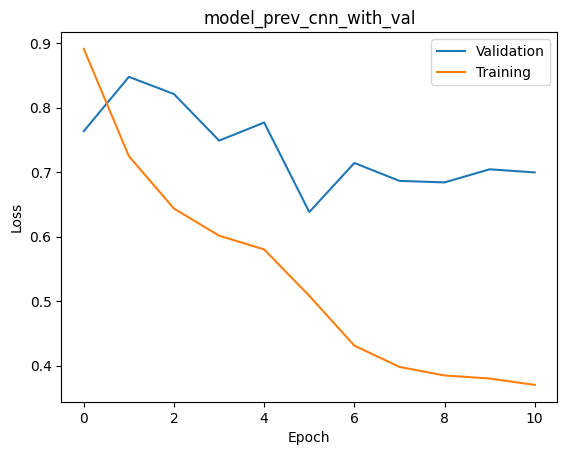

In [19]:
import matplotlib.pyplot as plt
import numpy as np
checkpoint = torch.load("model_prev_cnn_with_val.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
# print(epochs)

plt.plot(np.arange(epochs+ 1), val_losses)
plt.plot(np.arange(epochs+ 1), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("model_prev_cnn_with_val")
plt.show()


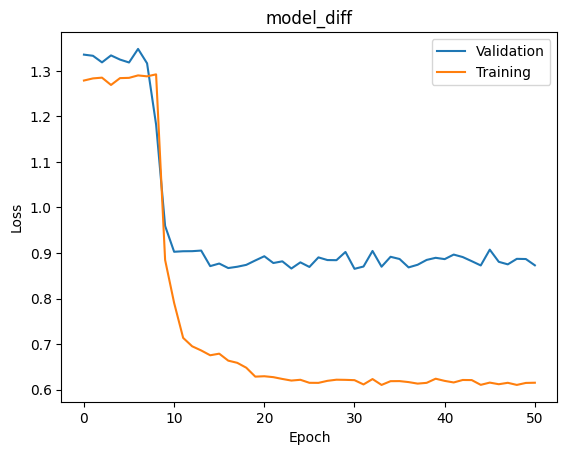

In [23]:
checkpoint = torch.load("model_diff.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
# print(epochs)

plt.plot(np.arange(epochs+ 1), val_losses)
plt.plot(np.arange(epochs+ 1), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("model_diff")
plt.show()

KeyError: 'val_losses_so_far'